In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 27s 0us/step


In [3]:
print('X_train shape - ',X_train.shape)
print('X_test shape - ',X_test.shape)
print('y_train shape - ',y_train.shape)
print('y_test shape - ',y_test.shape)

X_train shape -  (50000, 32, 32, 3)
X_test shape -  (10000, 32, 32, 3)
y_train shape -  (50000, 1)
y_test shape -  (10000, 1)


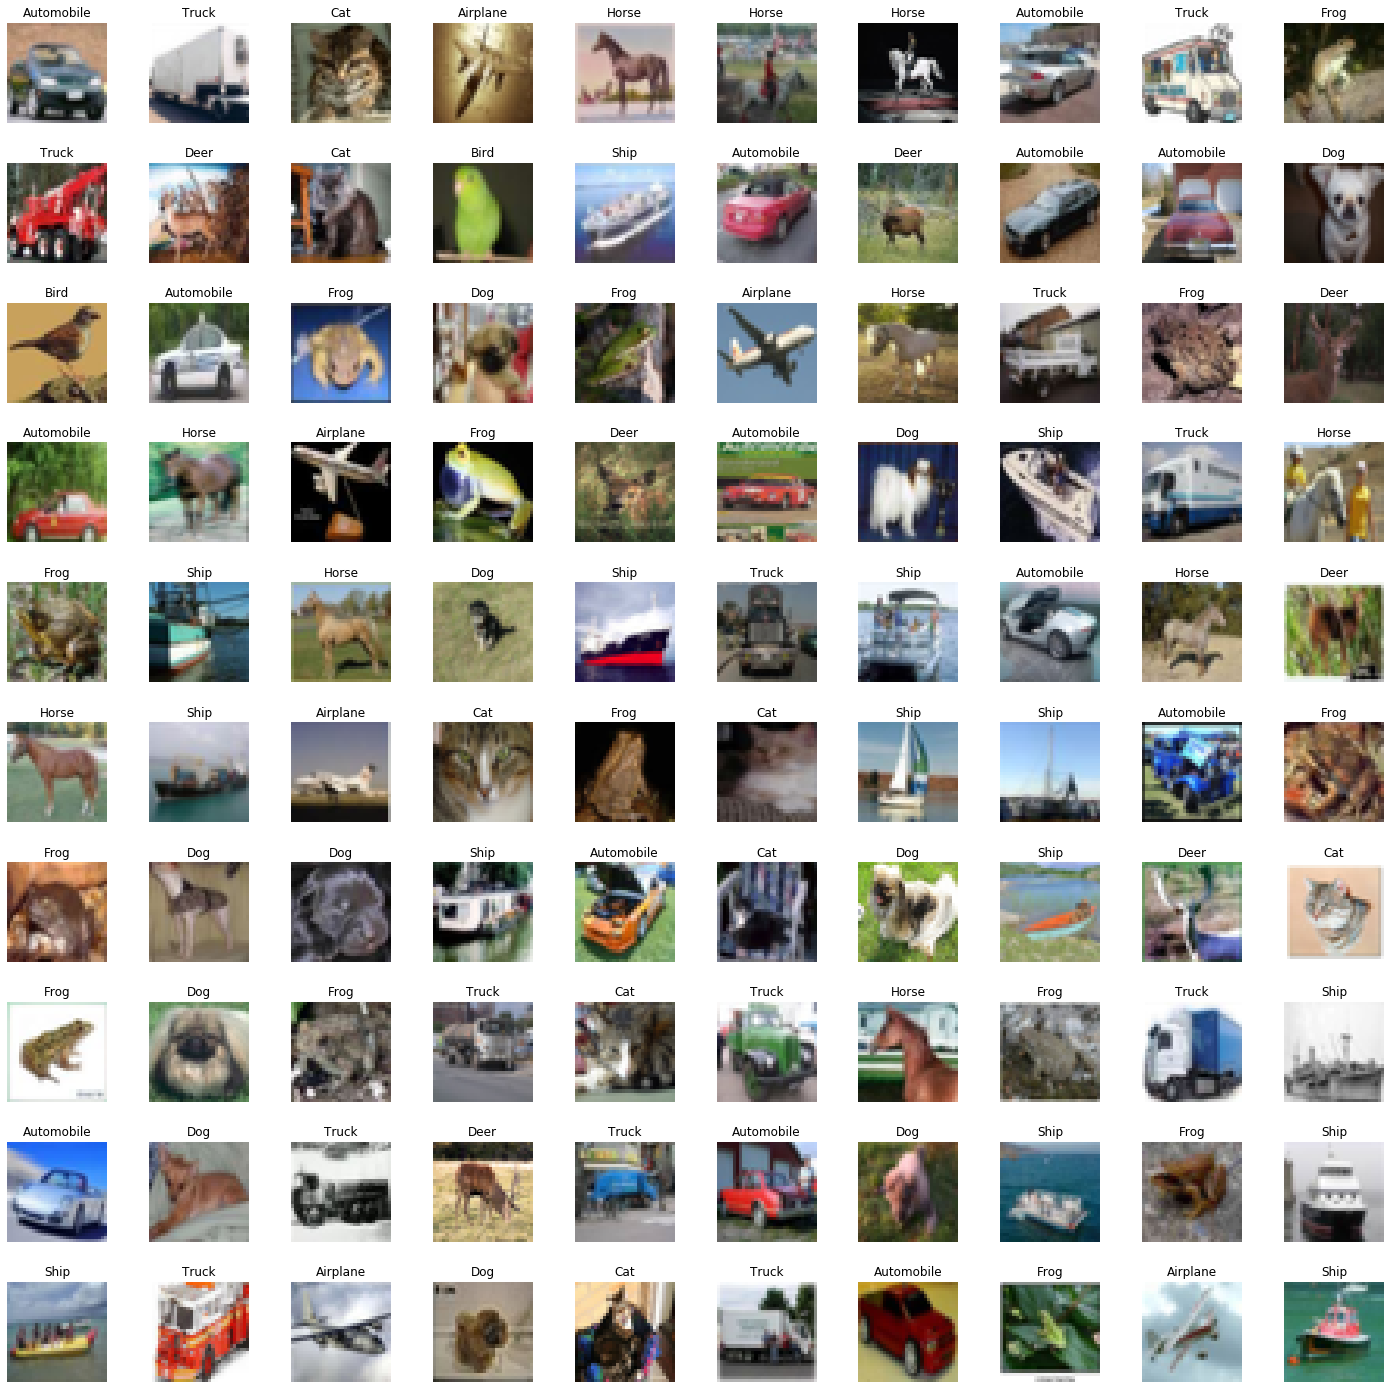

In [5]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in range(0,L_grid*W_grid):
    index = np.random.randint(0,n_training) # pick a random number
    axes[i].imshow(X_train[index])
    index = y_train[index]
    axes[i].set_title(labels[int(index)])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [7]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,AveragePooling2D,MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [10]:
cifar_model = Sequential()
cifar_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cifar_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cifar_model.add(MaxPooling2D(2,2))
cifar_model.add(Dropout(0.4))


cifar_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cifar_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cifar_model.add(AveragePooling2D(2,2))
cifar_model.add(Dropout(0.4))

cifar_model.add(Flatten())

cifar_model.add(Dense(units = 1024, activation = 'relu'))

cifar_model.add(Dense(units = 1024, activation = 'relu'))

cifar_model.add(Dense(units = 10, activation = 'softmax'))

In [11]:
cifar_model.compile(loss = 'categorical_crossentropy',\
                  optimizer = keras.optimizers.Adam(lr = 0.001), metrics = ['accuracy'])

In [13]:
cifar_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 128)        

In [15]:
history = cifar_model.fit(X_train, y_train, batch_size = 32,\
                        epochs = 10, shuffle = True,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 376s 8ms/step - loss: 1.5554 - accuracy: 0.4304 - val_loss: 1.1936 - val_accuracy: 0.5717
Epoch 2/10
50000/50000 [==============================] - 372s 7ms/step - loss: 1.1489 - accuracy: 0.5907 - val_loss: 1.0388 - val_accuracy: 0.6391
Epoch 3/10
50000/50000 [==============================] - 493s 10ms/step - loss: 0.9769 - accuracy: 0.6548 - val_loss: 0.9023 - val_accuracy: 0.6751
Epoch 4/10
50000/50000 [==============================] - 383s 8ms/step - loss: 0.8691 - accuracy: 0.6926 - val_loss: 0.8375 - val_accuracy: 0.7074
Epoch 5/10
50000/50000 [==============================] - 385s 8ms/step - loss: 0.7770 - accuracy: 0.7247 - val_loss: 0.7353 - val_accuracy: 0.7461
Epoch 6/10
50000/50000 [==============================] - 384s 8ms/step - loss: 0.7027 - accuracy: 0.7508 - val_loss: 0.7283 - val_accuracy: 0.7530
Epoch 7/10
50000/50000 [==============================] - 390

In [19]:
cifar_model.save("trained\cifar10_model.h5")